# What are the news talking about heatwaves?

In [130]:
# libraries
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import spacy
npl = spacy.load('en_core_web_lg')
stopwords = npl.Defaults.stop_words

In [202]:
# Global definitions
%run -i 00functions.py
directory_path = os.getcwd()

In [132]:
# weatwaves
news_path = directory_path + "/dat/03_newsContentProprocess.xlsx"
news_data = pd.read_excel(news_path)
news_data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,link,title,text,keywords,summary,text1,summary1,title1,text2,title2,summary2
0,0,0,0,https://www.cbc.ca/news/science/naming-heat-wa...,International project to name heat waves met w...,"As climate change makes heat waves worse, an i...","['waves', 'heat', 'skepticism', 'wave', 'think...","As climate change makes heat waves worse, an i...",climate change make heat wave bad internationa...,climate change make heat wave bad internationa...,international project heat wave meet skepticis...,climate change make wave bad international pro...,international project wave meet skepticism int...,climate change bad international project exper...
1,1,1,0,https://www.dw.com/en/germany-battles-heat-wav...,Germany battles heat waves with drinking water...,At the drinking fountain outside Berlin's busy...,"['tap', 'waves', 'heat', 'water', 'fountains',...","""It can only be a good thing to have more drin...",drinking fountain outside berlin busy gesundbr...,good thing drinking fountain heat unbearable h...,germany battle heat wave drink water fountain,drinking fountain outside berlin busy gesundbr...,germany battle wave drink water fountain,good thing drinking fountain unbearable hot au...
2,2,2,0,https://www.foxweather.com/weather-news/heat-w...,Streaking in the 90s: Cities across US set rec...,An extended heat wave gripping the Northeast o...,"['waves', 'heat', 'records', 'streaking', 'day...",An extended heat wave gripping the Northeast o...,extended heat wave grip northeast past day set...,extended heat wave grip northeast past day set...,streak city set record heat wave degree,extend grip northeast past day set record cons...,streak city set record wave degree,extended grip northeast past day set record co...
3,3,3,0,https://www.usatoday.com/story/news/nation/202...,Weather forecast: Heat waves may now get names...,"This summer, Seville, a city in southwestern S...","['waves', 'heat', 'olalla', 'wave', 'forecast'...","This summer, Seville, a city in southwestern S...",summer seville city southwestern spain experie...,summer seville city southwestern spain experie...,weather forecast heat wave name zoe spain,summer seville city southwestern spain experie...,weather forecast wave name zoe spain,summer seville city southwestern spain experie...
4,4,4,0,https://www.grid.news/story/climate/2022/08/09...,Extreme heat waves show the ultimate climate i...,The road to an unlivable climate isn’t exactly...,"['waves', 'heat', 'thought', 'wetbulb', 'unwor...",The road to an unlivable climate isn’t exactly...,road unlivable climate isn exactly scenic rout...,road unlivable climate isn exactly scenic rout...,extreme heat wave ultimate climate impact arri...,road unlivable climate isn exactly scenic rout...,extreme wave ultimate climate impact arrive so...,road unlivable climate isn exactly scenic rout...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,451,456,0,https://www.dw.com/en/climate-crisis-heat-baby...,Indian heatwaves threaten maternal and baby he...,The heatwave that swept across South Asia in A...,"['baby', 'heat', 'health', 'india', 'indian', ...",With climate change exacerbating extreme heat ...,heatwave sweep south asia april come bad time ...,climate change exacerbate extreme heat part wo...,indian heatwave threaten maternal baby health,sweep south asia april come bad time babita ba...,indian heatwave threaten maternal baby health,climate change exacerbate extreme world expert...
452,452,457,0,https://www.gov.uk/government/publications/hea...,Looking after children and those in early year...,Children’s susceptibility to high temperatures...,"['high', 'heat', 'water', 'temperature', 'scho...",Children’s susceptibility to high temperatures...,child susceptibility high temperature vary yea...,child susceptibility high temperature vary yea...,look child early year setting heatwave teacher...,child susceptibility high temperature vary yea...,look child early year setting heatwave teacher...

# CLUSTERS

## For text

In [133]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), use_idf=True)
X = vectorizer.fit_transform(news_data["text2"])

In [134]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,12)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

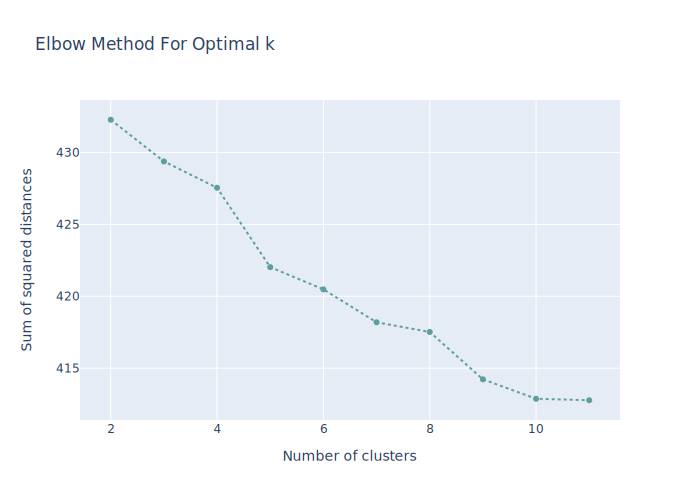

In [135]:
# Generating graphic
fig = px.line(x=K, y=Sum_of_squared_distances,  
              title="Elbow Method For Optimal k",
             labels={
                     "y": "Sum of squared distances",
                     "x": 'Number of clusters'
                 })
fig.update_traces(mode="markers+lines", line = dict(dash='dot', color = 'cadetblue'))
#fig.show()
fig.show(renderer="svg")

In [138]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
clusters=pd.DataFrame(list(zip(news_data["text2"],labels)),columns=['text2','cluster'])
print(clusters)

                                                 text2  cluster
0    climate change make wave bad international pro...        1
1    drinking fountain outside berlin busy gesundbr...        1
2    extend grip northeast past day set record cons...        0
3    summer seville city southwestern spain experie...        1
4    road unlivable climate isn exactly scenic rout...        4
..                                                 ...      ...
451  sweep south asia april come bad time babita ba...        4
452  child susceptibility high temperature vary yea...        4
453  pay base use start purchase team enterprise su...        1
454  record shattering engulf india pakistan march ...        4
455  new research study reveal intense heatwave wor...        2

[456 rows x 2 columns]


Cluster: 0
Titles


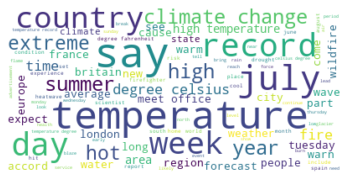

Cluster: 1
Titles


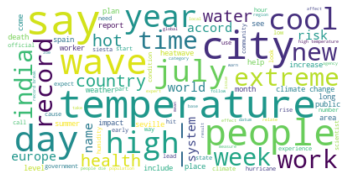

Cluster: 2
Titles


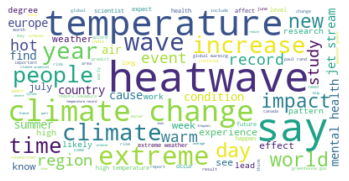

Cluster: 3
Titles


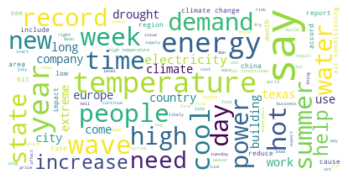

Cluster: 4
Titles


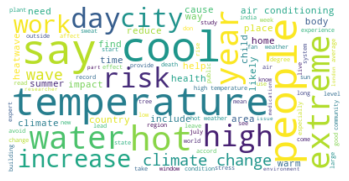

Cluster: 5
Titles


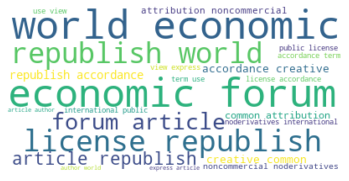

In [139]:
from wordcloud import WordCloud
result={'cluster':labels,'text':news_data["text2"]}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s = result[result.cluster==k]
   text = s['text'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=clusters[clusters.cluster==k]['text2']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

## For summary

In [140]:
X1 = vectorizer.fit_transform(news_data["summary2"])

In [141]:
Sum_of_squared_distances = []
K = range(2,12)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X1)
   Sum_of_squared_distances.append(km.inertia_)

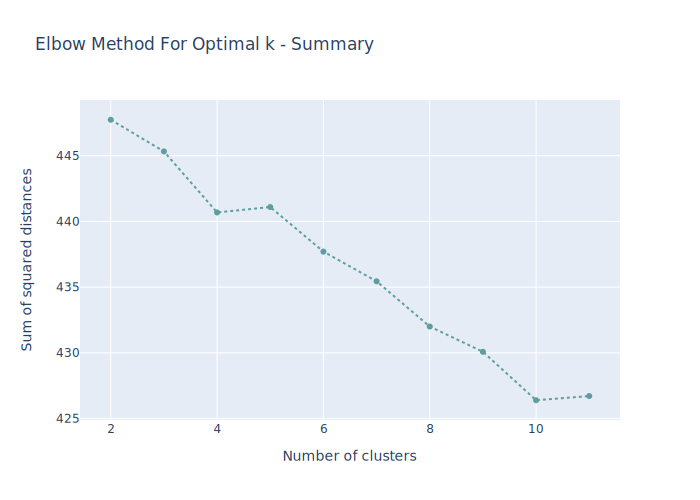

In [199]:
# Generating graphic
fig = px.line(x=K, y=Sum_of_squared_distances,  
              title="Elbow Method For Optimal k - Summary",
             labels={
                     "y": "Sum of squared distances",
                     "x": 'Number of clusters'
                 })
fig.update_traces(mode="markers+lines", line = dict(dash='dot', color = 'cadetblue'))
#fig.show()
fig.show(renderer="svg")

In [200]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X1)
labels=model.labels_
clusters=pd.DataFrame(list(zip(news_data["summary2"],labels)),columns=['summary2','cluster'])
clusters_summ=pd.DataFrame(zip(news_data["link"],labels),columns=['link','cluster'])
print(clusters)

                                              summary2  cluster
0    climate change bad international project exper...        2
1    good thing drinking fountain unbearable hot au...        3
2    extended grip northeast past day set record co...        2
3    summer seville city southwestern spain experie...        3
4    road unlivable climate isn exactly scenic rout...        2
..                                                 ...      ...
451  climate change exacerbate extreme world expert...        4
452  child susceptibility high temperature vary yea...        4
453  pay base useget startedpurchase team enterpris...        4
454  particularly dire india pakistan step improve ...        2
455  new research study reveal intense world remark...        2

[456 rows x 2 columns]


Cluster: 0
Titles


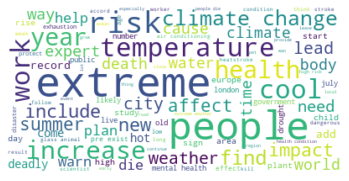

Cluster: 1
Titles


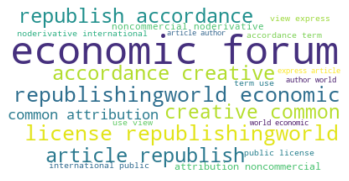

Cluster: 2
Titles


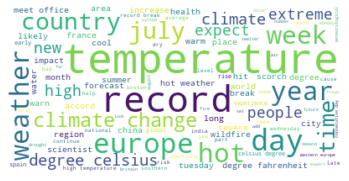

Cluster: 3
Titles


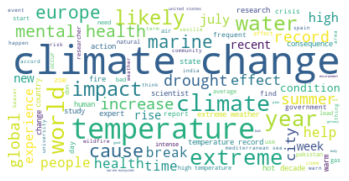

Cluster: 4
Titles


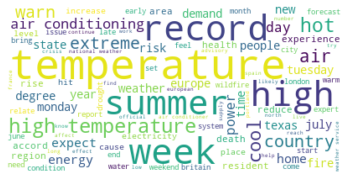

In [201]:
from wordcloud import WordCloud
result={'cluster':labels,'text':news_data["summary2"]}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s = result[result.cluster==k]
   text = s['text'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=clusters[clusters.cluster==k]['summary2']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

# TOPIC MODELING

## For text

In [18]:
# Second alternative
import gensim
from gensim.corpora.dictionary import Dictionary

In [64]:
# Se inicializa un Tokenizador
from nltk.tokenize import ToktokTokenizer
tokenizer = ToktokTokenizer() 

# new stop words
new_stop_words = ['ll', 've', 'heat', 'wave', 'heatwave', 'say', 'like', 'temperature', 'degree']
stopwords.update(new_stop_words)

# Se filtran los digitos y las stopwords
def filter_stopword(tokens):
    return [token for token in tokens if token not in new_stop_words]

In [65]:
from nltk.tokenize import ToktokTokenizer
tokenizer = ToktokTokenizer() 
def cleaning_text2(text):
    cleantext =  ' '.join([word for word in text.split() if word not in new_stop_words])
    cleantext = tokenizer.tokenize(cleantext)
    return cleantext

In [98]:
news_data['text3'] = news_data['text2'].apply(cleaning_text2)
news_data['title3'] = news_data['title2'].apply(cleaning_text2)
news_data['summary3'] = news_data['summary2'].apply(cleaning_text2)

In [67]:
dicc1 = Dictionary(news_data.text3)
print(f'number of tokens: {len(dicc1)}')
dicc1.filter_extremes(no_below=2, no_above = 0.8)
print(f'New number of tokens: {len(dicc1)}')
dicc1.save(directory_path + "/dat/dicc_text")
# creating corpus
corpus1 = [dicc1.doc2bow(text) for text in news_data.text3]

number of tokens: 12905
New number of tokens: 6511


In [68]:
from gensim.models import LdaMulticore, CoherenceModel

In [69]:
N_topics = [2, 3, 4, 5, 6, 7, 8]

In [70]:
results = []
for topics in N_topics:
    print("\n-------------------------------------------------------------------------------")
    print(" # Topics " + str(topics))
    # training LDA model
    lda = LdaMulticore(corpus=corpus1, id2word=dicc1, num_topics=topics, random_state=42, passes=10, 
                        workers=4)
    # Save trained LDA model
    temp_file = directory_path + "/output/lda_model_" + "_" + str(topics)
    lda.save(temp_file)
    # Se imprime los topicos encontrados, junto con las palabras que lo representan 
    for i in range(0, lda.num_topics):
        print(str(i) + "-----")
        print(lda.print_topic(i))
        print("\n")
    # Coherence
    coherence_model_lda = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    # Saving results
    results.append([topics, coherence_lda])


-------------------------------------------------------------------------------
 # Topics 2
0-----
0.013*"climate" + 0.010*"people" + 0.009*"extreme" + 0.009*"change" + 0.008*"record" + 0.007*"high" + 0.007*"health" + 0.007*"weather" + 0.006*"year" + 0.005*"day"


1-----
0.008*"high" + 0.008*"hot" + 0.008*"cool" + 0.007*"day" + 0.007*"air" + 0.007*"record" + 0.006*"year" + 0.006*"water" + 0.006*"people" + 0.006*"weather"



-------------------------------------------------------------------------------
 # Topics 3
0-----
0.014*"climate" + 0.010*"people" + 0.009*"change" + 0.009*"extreme" + 0.007*"record" + 0.007*"health" + 0.006*"weather" + 0.006*"high" + 0.006*"increase" + 0.005*"year"


1-----
0.010*"cool" + 0.009*"air" + 0.009*"hot" + 0.008*"water" + 0.007*"year" + 0.007*"high" + 0.006*"people" + 0.006*"day" + 0.005*"summer" + 0.005*"energy"


2-----
0.011*"record" + 0.010*"high" + 0.009*"weather" + 0.009*"day" + 0.008*"climate" + 0.008*"people" + 0.007*"week" + 0.007*"hot" + 0.007

## For summary

In [99]:
dicc3 = Dictionary(news_data.summary3)
print(f'number of tokens: {len(dicc3)}')
dicc3.filter_extremes(no_below=2, no_above = 0.8)
print(f'New number of tokens: {len(dicc3)}')
dicc3.save(directory_path + "/dat/dicc_summary")
# creating corpus
corpus3 = [dicc3.doc2bow(text) for text in news_data.summary3]

number of tokens: 4755
New number of tokens: 2055


In [100]:
results = []
for topics in N_topics:
    print("\n-------------------------------------------------------------------------------")
    print(" # Topics " + str(topics))
    # training LDA model
    lda = LdaMulticore(corpus=corpus3, id2word=dicc3, num_topics=topics, random_state=42, passes=10, 
                        workers=4)
    # Save trained LDA model
    temp_file = directory_path + "/output/summary_lda_model_" + "_" + str(topics)
    lda.save(temp_file)
    # Se imprime los topicos encontrados, junto con las palabras que lo representan 
    for i in range(0, lda.num_topics):
        print(str(i) + "-----")
        print(lda.print_topic(i))
        print("\n")
    # Coherence
    coherence_model_lda = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    # Saving results
    results.append([topics, coherence_lda])


-------------------------------------------------------------------------------
 # Topics 2
0-----
0.021*"climate" + 0.016*"change" + 0.012*"extreme" + 0.011*"people" + 0.009*"health" + 0.008*"air" + 0.008*"cool" + 0.007*"hot" + 0.007*"high" + 0.007*"weather"


1-----
0.020*"record" + 0.012*"day" + 0.011*"high" + 0.011*"week" + 0.011*"weather" + 0.009*"europe" + 0.008*"hot" + 0.008*"year" + 0.008*"july" + 0.008*"extreme"



-------------------------------------------------------------------------------
 # Topics 3
0-----
0.016*"climate" + 0.012*"change" + 0.011*"high" + 0.009*"cool" + 0.008*"water" + 0.007*"hot" + 0.007*"weather" + 0.007*"drought" + 0.007*"people" + 0.006*"summer"


1-----
0.023*"record" + 0.012*"day" + 0.011*"week" + 0.010*"high" + 0.010*"europe" + 0.009*"july" + 0.009*"weather" + 0.008*"year" + 0.008*"hot" + 0.007*"break"


2-----
0.020*"climate" + 0.018*"extreme" + 0.015*"change" + 0.014*"people" + 0.014*"health" + 0.010*"air" + 0.010*"weather" + 0.008*"hot" + 0.00

## For title

In [72]:
dicc2 = Dictionary(news_data.title3)
print(f'number of tokens: {len(dicc2)}')
dicc2.filter_extremes(no_below=2, no_above = 0.8)
print(f'New number of tokens: {len(dicc2)}')
dicc2.save(directory_path + "/dat/dicc_title")
# creating corpus
corpus2 = [dicc2.doc2bow(text) for text in news_data.title3]

number of tokens: 1022
New number of tokens: 395


In [73]:
results = []
for topics in N_topics:
    print("\n-------------------------------------------------------------------------------")
    print(" # Topics " + str(topics))
    # training LDA model
    lda = LdaMulticore(corpus=corpus2, id2word=dicc2, num_topics=topics, random_state=42, passes=10, 
                        workers=4)
    # Save trained LDA model
    temp_file = directory_path + "/output/title_lda_model_" + "_" + str(topics)
    lda.save(temp_file)
    # Se imprime los topicos encontrados, junto con las palabras que lo representan 
    for i in range(0, lda.num_topics):
        print(str(i) + "-----")
        print(lda.print_topic(i))
        print("\n")
    # Coherence
    coherence_model_lda = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    # Saving results
    results.append([topics, coherence_lda])


-------------------------------------------------------------------------------
 # Topics 2
0-----
0.034*"climate" + 0.024*"change" + 0.019*"health" + 0.016*"extreme" + 0.014*"people" + 0.013*"deadly" + 0.013*"record" + 0.013*"cool" + 0.012*"risk" + 0.012*"city"


1-----
0.043*"europe" + 0.022*"hot" + 0.019*"record" + 0.015*"weather" + 0.014*"extreme" + 0.013*"summer" + 0.011*"climate" + 0.011*"hit" + 0.011*"world" + 0.011*"day"



-------------------------------------------------------------------------------
 # Topics 3
0-----
0.034*"health" + 0.024*"deadly" + 0.022*"risk" + 0.018*"people" + 0.017*"world" + 0.015*"cool" + 0.014*"name" + 0.014*"mental" + 0.014*"animal" + 0.014*"glass"


1-----
0.038*"europe" + 0.023*"weather" + 0.023*"hot" + 0.016*"day" + 0.016*"extreme" + 0.015*"crisis" + 0.015*"summer" + 0.015*"hit" + 0.012*"week" + 0.012*"spain"


2-----
0.055*"climate" + 0.035*"change" + 0.033*"europe" + 0.028*"record" + 0.020*"extreme" + 0.016*"new" + 0.014*"year" + 0.014*"brita

# Named entity recognition

In [102]:
df_NER = pd.DataFrame([])

In [103]:
text = news_data.text.iloc[0]
for index, row in news_data.iterrows():
    text = row['text']
    link = row['link']
    py_text = npl(text)
    for word in py_text.ents:
        vector = [link, word.label_, word.text]
        vector = pd.DataFrame(vector).transpose()
        df_NER = pd.concat([df_NER,vector])

In [109]:
df_NER.columns = ['link', 'type_NER', 'entity']

In [126]:
df_NER

,link,type_NER,entity
0,https://www.cbc.ca/news/science/naming-heat-wa...,LOC,North America
0,https://www.cbc.ca/news/science/naming-heat-wa...,LOC,Europe
0,https://www.cbc.ca/news/science/naming-heat-wa...,ORG,The Adrienne Arsht Rockefeller Foundation Resi...
0,https://www.cbc.ca/news/science/naming-heat-wa...,GPE,Washington
0,https://www.cbc.ca/news/science/naming-heat-wa...,ORG,The World Economic Forum
...,...,...,...
0,https://scitechdaily.com/most-extreme-heatwave...,PERSON,Gabrielle C. Hegerl
0,https://scitechdaily.com/most-extreme-heatwave...,PERSON,Dann Mitchell
0,https://scitechdaily.com/most-extreme-heatwave...,DATE,4 May 2022
0,https://scitechdaily.com/most-extreme-heatwave...,ORG,Science Advances


In [127]:
clusters_summ

,link,cluster
0,https://www.cbc.ca/news/science/naming-heat-wa...,1
1,https://www.dw.com/en/germany-battles-heat-wav...,3
2,https://www.foxweather.com/weather-news/heat-w...,2
3,https://www.usatoday.com/story/news/nation/202...,2
4,https://www.grid.news/story/climate/2022/08/09...,1
...,...,...
451,https://www.dw.com/en/climate-crisis-heat-baby...,0
452,https://www.gov.uk/government/publications/hea...,2
453,https://www.ft.com/content/48f20f75-92aa-40d5-...,3
454,https://theconversation.com/a-climate-scientis...,0


In [128]:
union = df_NER.merge(clusters_summ, on='link', how='inner')

In [203]:
union['entity1'] = union['entity'].apply(cleaning_text3)

In [206]:
union.to_excel(directory_path + "/output/NER.xlsx")

In [204]:
union

,link,type_NER,entity,cluster,entity1
0,https://www.cbc.ca/news/science/naming-heat-wa...,LOC,North America,1,north america
1,https://www.cbc.ca/news/science/naming-heat-wa...,LOC,Europe,1,europe
2,https://www.cbc.ca/news/science/naming-heat-wa...,ORG,The Adrienne Arsht Rockefeller Foundation Resi...,1,adrienne arsht rockefeller foundation resilien...
3,https://www.cbc.ca/news/science/naming-heat-wa...,GPE,Washington,1,washington
4,https://www.cbc.ca/news/science/naming-heat-wa...,ORG,The World Economic Forum,1,world economic forum
...,...,...,...,...,...
25995,https://scitechdaily.com/most-extreme-heatwave...,PERSON,Gabrielle C. Hegerl,1,gabrielle c hegerl
25996,https://scitechdaily.com/most-extreme-heatwave...,PERSON,Dann Mitchell,1,dann mitchell
25997,https://scitechdaily.com/most-extreme-heatwave...,DATE,4 May 2022,1,4 2022
25998,https://scitechdaily.com/most-extreme-heatwave...,ORG,Science Advances,1,science advances


In [210]:
countEntitys = union.groupby(['type_NER','cluster', 'entity1']).count().reset_index()

In [222]:
countEntitys.cluster.value_counts()

1    3185
2    3159
0    2284
3    2162
4       3
Name: cluster, dtype: int64

In [223]:
ner_LOC = countEntitys[countEntitys['type_NER']=="LOC"]
ner_LOC = ner_LOC.sort_values(by="entity", ascending=False)
ner_LOC = ner_LOC.groupby('cluster').head(20)
ner_LOC

,type_NER,cluster,entity1,link,entity
4656,LOC,1,europe,160,160
4787,LOC,2,europe,159,159
4897,LOC,3,europe,69,69
4555,LOC,0,europe,55,55
4633,LOC,1,arctic,24,24
...,...,...,...,...,...
4894,LOC,3,east coast,2,2
4882,LOC,3,b c,2,2
4935,LOC,3,south asia s,2,2
4916,LOC,3,new england,2,2


In [235]:
ner_ORG = countEntitys[countEntitys['type_NER']=="ORG"]
ner_ORG = ner_ORG.sort_values(by="entity", ascending=False)
ner_ORG = ner_ORG.groupby('cluster').head(20)
ner_ORG

,type_NER,cluster,entity1,link,entity
6168,ORG,1,met office,43,43
6808,ORG,2,met office,35,35
5584,ORG,0,met office,27,27
6476,ORG,1,wmo,20,20
6856,ORG,2,national weather service,19,19
...,...,...,...,...,...
5607,ORG,0,météo france,4,4
7279,ORG,3,health canada,4,4
7141,ORG,3,carr,4,4
7450,ORG,3,reuters,4,4


In [234]:
ner_GPE = countEntitys[countEntitys['type_NER']=="GPE"]
ner_GPE = ner_GPE.sort_values(by="entity", ascending=False)
ner_GPE = ner_GPE.groupby('cluster').head(20)
ner_GPE

,type_NER,cluster,entity1,link,entity
3252,GPE,0,india,158,158
3764,GPE,1,uk,119,119
4187,GPE,2,uk,97,97
3551,GPE,1,france,93,93
3996,GPE,2,london,91,91
...,...,...,...,...,...
4471,GPE,3,texas,11,11
4488,GPE,3,vienna,10,10
4281,GPE,3,california,10,10
4426,GPE,3,phoenix,9,9


In [236]:
pip list

Package              Version
-------------------- ---------
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               4.1.0
blis                 0.7.8
bs4                  0.0.1
catalogue            2.0.8
certifi              2022.6.15
cffi                 1.15.1
charset-normalizer   2.1.0
click                8.1.3
colorama             0.4.5
cssselect            1.1.0
cycler               0.11.0
cymem                2.0.6
Cython               0.29.28
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
en-core-web-lg       3.4.0
en-core-web-sm       3.4.0
entrypoints          0.4
et-xmlfile           1.1.0
executing            0.8.3
fastjsonschema       2.15.1
feedfinder2          0.0.4
feedparser           6.0.10
filelock             3.8.0
fonttools            4.34.4
gensim               4.2.0
html5lib             1.1
idna       